In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [26]:
# Load and Normalize the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

In [27]:
def create_model(n_filters=32, dropout_rate=0.25, dense_size=512):
    model = Sequential([
        Conv2D(n_filters, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(n_filters, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),

        Conv2D(n_filters * 2, (3, 3), padding='same', activation='relu'),
        Conv2D(n_filters * 2, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),

        Flatten(),
        Dense(dense_size, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model


In [28]:
def compile_and_train(model, learning_rate=0.001, batch_size=64, epochs=15):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_test, y_test_one_hot))
    return history

In [24]:
filter_sizes = [16, 32, 64]
accuracies = []

for filters in filter_sizes:
    print(f"\nTraining with {filters} filters.")
    model = create_model(n_filters=filters)
    history = compile_and_train(model)
    accuracies.append(history.history['val_accuracy'][-1])  # Collect the last validation accuracy



Training with 16 filters.
Epoch 1/15
782/782 [==============================] - 113s 143ms/step - loss: 1.5973 - accuracy: 0.4164 - val_loss: 1.3323 - val_accuracy: 0.5234
Epoch 2/15
782/782 [==============================] - 113s 145ms/step - loss: 1.2750 - accuracy: 0.5430 - val_loss: 1.0968 - val_accuracy: 0.6113
Epoch 3/15
782/782 [==============================] - 109s 139ms/step - loss: 1.1233 - accuracy: 0.5982 - val_loss: 1.0840 - val_accuracy: 0.6239
Epoch 4/15
782/782 [==============================] - 107s 136ms/step - loss: 1.0165 - accuracy: 0.6408 - val_loss: 0.9225 - val_accuracy: 0.6769
Epoch 5/15
782/782 [==============================] - 106s 135ms/step - loss: 0.9226 - accuracy: 0.6744 - val_loss: 0.8553 - val_accuracy: 0.7020
Epoch 6/15
782/782 [==============================] - 109s 140ms/step - loss: 0.8555 - accuracy: 0.6982 - val_loss: 0.7950 - val_accuracy: 0.7249
Epoch 7/15
782/782 [==============================] - 110s 141ms/step - loss: 0.8018 - accuracy: 

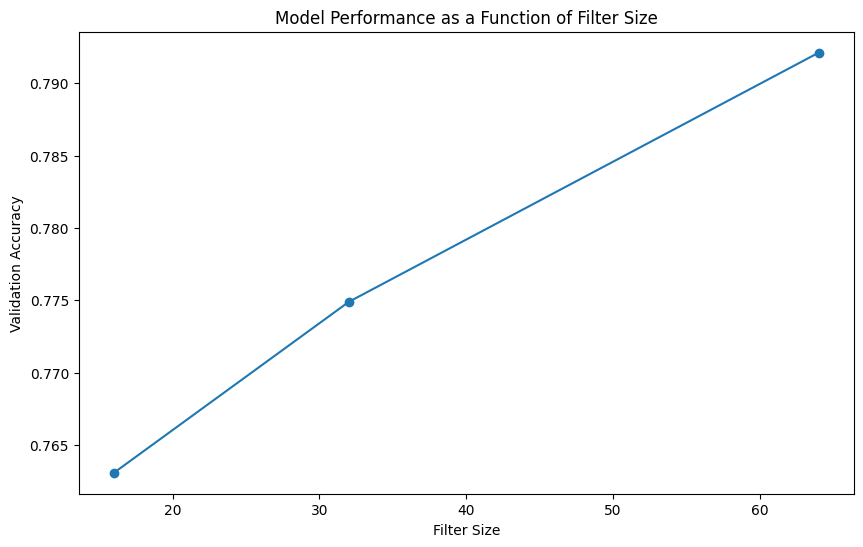

In [29]:
# Cell 6: Plot the Performance as a Function of Filter Size
plt.figure(figsize=(10, 6))
plt.plot(filter_sizes, accuracies, marker='o', linestyle='-')
plt.title('Model Performance as a Function of Filter Size')
plt.xlabel('Filter Size')
plt.ylabel('Validation Accuracy')
plt.show()
